# Algorithms 202: Coursework 2 Task 2: Random Shuffling

Group-ID: XX

Group members: ADD NAMES HERE

## Objectives

The aim of this coursework is to enhance your algorithmic skills by developing algorithms from textual, non-formal descriptions. You are asked to show that you can:

- implement different random shuffling algorithms
- compare those algorithms using visual representations

This notebook *is* the coursework. It contains cells with function definitions that you will need to complete. You will submit this notebook as your coursework.

## Preliminaries: helper functions

Here we define a collection of functions that will be useful for the rest of the coursework. You'll need to run this cell to get started.

In [211]:
%matplotlib inline
from matplotlib import pyplot as plt
import random
import numpy as np
import matplotlib.cm as cm

## Task 2: Random Shuffling

In this task you are asked to implement `random_sort_shuffle` and `fisher_yates_shuffle`. Additionally, you will need to implement visualisation techniques that can be used to compare the output of the different random shuffling algorithms.

Complete the below function definitions in the provided skeleton code. Do not change the names of the functions or their arguments.

### 2a. Implement `random_sort_shuffle`

The `random_sort_shuffle` function should follow the idea of using a random comparator for sorting the array `a`. See lecture slides for details. You might want to search the web for hints on how to use Python's sort function with a custom comparator. (`functools.cmp_to_key` will be very useful)

In [196]:
from functools import cmp_to_key

def random_sort_shuffle(a):
    a = sorted(a, key = cmp_to_key(random_comparator))
    return a

def random_comparator(x, y):
    return random.randint(-1,1)


### 2b. Implement `fisher_yates_shuffle`

The `fisher_yates_shuffle` function should implement one of the two versions of Fisher-Yates shuffle as outlined in the lecture slides.

In [206]:
def fisher_yates_shuffle(a):
    length = len(a)
    n = length - 1
    for i in range(n,1,-1):
        j = random.randint(0, i)
        a[i], a[j] = a[j], a[i]
    return a

### 2c. Implement buggy `fisher_yates_shuffle`

Check out the lecture slides for two common bugs that are found in Fisher-Yates shuffle implementations. Implement two buggy versions of `fisher_yates_shuffle` for later analysis.

In [208]:
def fisher_yates_shuffle_buggy1(a):
    length = len(a)
    n = length - 1
    for i in range(n,1,-1):
        j = random.randint(0, i - 1)
        a[i], a[j] = a[j], a[i]
    return a

def fisher_yates_shuffle_buggy2(a):
    length = len(a)
    n = length - 1
    for i in range(n,1,-1):
        j = random.randint(0, n)
        a[i], a[j] = a[j], a[i]
    return a


### 2d. Perform empirical analysis

The empirical analysis is aiming to detect bias in the shuffle algorithms implemented above. You should build a swap matrix for each shuffle algorithm by executing them multiple times on suitable sequences with a fixed number of elements that allow you to track the random shuffles of elements.

You can visualise the swap matrices using the `plt.imshow(matrix)` function (see also the notebook on Random Sampling on the use of `plt.imshow`).

Plot the swap matrices and add a few lines of discussion about what you can conclude from the visualisations about possible bias in the different algorithms.

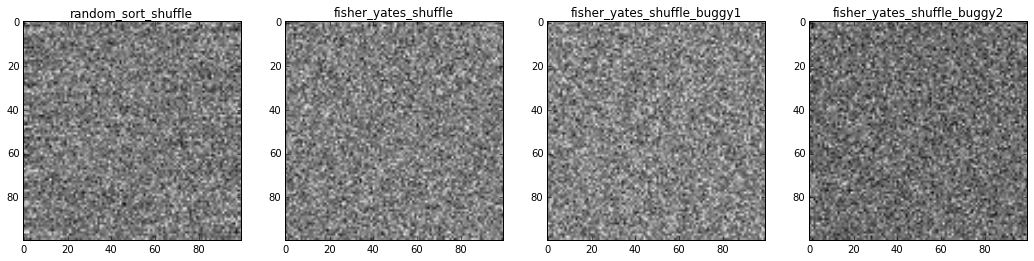

In [212]:
def build_swap_matrix(a, shuffle_func, times):
    
    length = len(a)
    swap_matrix = np.zeros((length, length))
    prev = list(a)
    
    for i in range(times):
        a = shuffle_func(a)
        for j in range(length):
            elem = prev[j]
            for k in range(length):
                if(elem == a[k]):
                    swap_matrix[j, k] += 1
                    continue
    prev = a
    return swap_matrix


a = random.sample(range(100), 100)
fig, axs = plt.subplots(1, 4, figsize=(18,5))

axs[0].imshow(build_swap_matrix(a, random_sort_shuffle, 1000), cmap = cm.Greys_r)
axs[0].set_title('random_sort_shuffle')
axs[1].imshow(build_swap_matrix(a, fisher_yates_shuffle, 1000), cmap = cm.Greys_r)
axs[1].set_title('fisher_yates_shuffle')
axs[2].imshow(build_swap_matrix(a, fisher_yates_shuffle_buggy1, 1000), cmap = cm.Greys_r)
axs[2].set_title('fisher_yates_shuffle_buggy1')
axs[3].imshow(build_swap_matrix(a, fisher_yates_shuffle_buggy2, 1000), cmap = cm.Greys_r)
axs[3].set_title('fisher_yates_shuffle_buggy2')


In [ ]:
# do analysis